<a href="https://colab.research.google.com/github/mnfibin/AI-ML-Internship-Elevate_Labs/blob/main/Task%202/notebooks/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPLORATORY DATA ANALYSIS (EDA)**
---
*   ### **Author:** FIBIN MN
*   ### **Dataset:** Titanic Dataset
*   ### **Tools:** Pandas, Matplotlib, Seaborn, Plotly

> # ***1. IMPORT LIBRARIES***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("="*80)
print("TITANIC DATASET - EXPLORATORY DATA ANALYSIS")
print("="*80)

TITANIC DATASET - EXPLORATORY DATA ANALYSIS


> # ***2. LOAD DATASET***

In [3]:
print("\n[STEP 1] Loading Dataset...")

# Upload the CSV file in Google Colab
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')
print(f"✓ Dataset loaded successfully!")
print(f"  Shape: {df.shape[0]} rows × {df.shape[1]} columns")


[STEP 1] Loading Dataset...


Saving Titanic-Dataset.csv to Titanic-Dataset.csv
✓ Dataset loaded successfully!
  Shape: 891 rows × 12 columns


> # ***3. INITIAL DATA EXPLORATION***

In [4]:
print("\n" + "="*80)
print("[STEP 2] Initial Data Exploration")
print("="*80)

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Last 5 Rows ---")
print(df.tail())

print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Column Names ---")
print(df.columns.tolist())

print("\n--- Data Types ---")
print(df.dtypes)

print("\n--- Dataset Shape ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


[STEP 2] Initial Data Exploration

--- First 5 Rows ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S 

> # ***4. SUMMARY STATISTICS***

In [6]:
print("\n" + "="*80)
print("[STEP 3] Summary Statistics")
print("="*80)

print("\n--- Numerical Features Summary ---")
print(df.describe())

print("\n--- Categorical Features Summary ---")
print(df.describe(include='object'))

print("\n--- Survival Rate ---")
print(f"Overall Survival Rate: {df['Survived'].mean()*100:.2f}%")
print(f"Total Survived: {df['Survived'].sum()}")
print(f"Total Died: {len(df) - df['Survived'].sum()}")


[STEP 3] Summary Statistics

--- Numerical Features Summary ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

--- Categorical


> # ***5. MISSING VALUES ANALYSIS***




[STEP 4] Missing Values Analysis
            Column  Missing_Count  Missing_Percentage
Cabin        Cabin            687               77.10
Age            Age            177               19.87
Embarked  Embarked              2                0.22


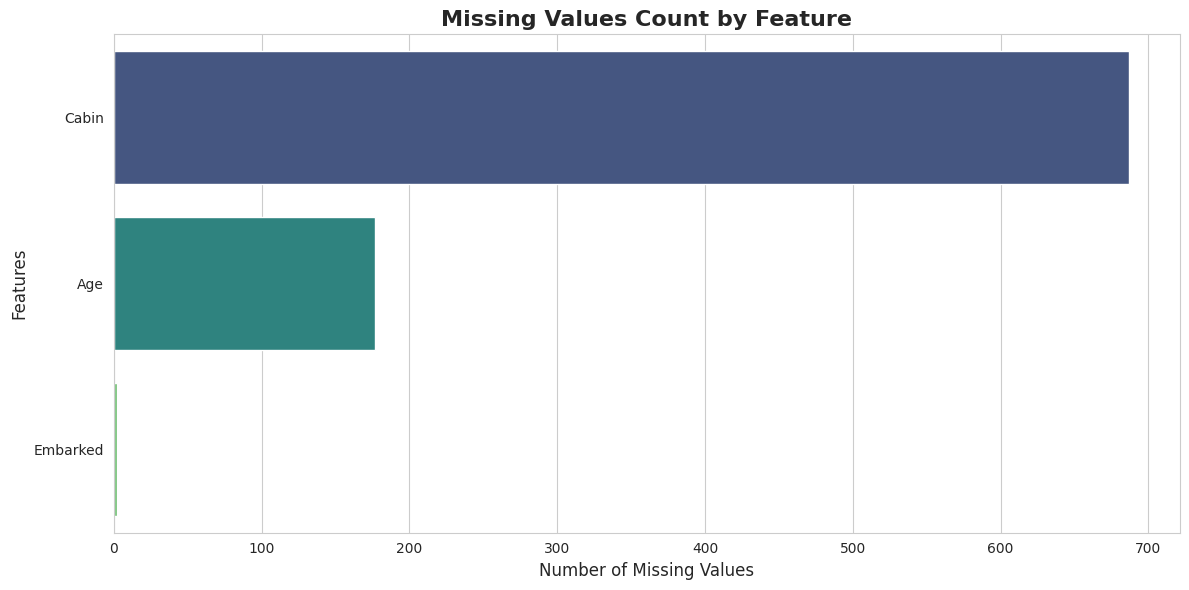

In [7]:
print("\n" + "="*80)
print("[STEP 4] Missing Values Analysis")
print("="*80)

missing = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing)

# Visualize missing values
plt.figure(figsize=(12, 6))
missing_data = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
sns.barplot(x=missing_data.values, y=missing_data.index, palette='viridis')
plt.title('Missing Values Count by Feature', fontsize=16, fontweight='bold')
plt.xlabel('Number of Missing Values', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

> # ***6. UNIVARIATE ANALYSIS - NUMERICAL FEATURES***


[STEP 5] Univariate Analysis - Numerical Features
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


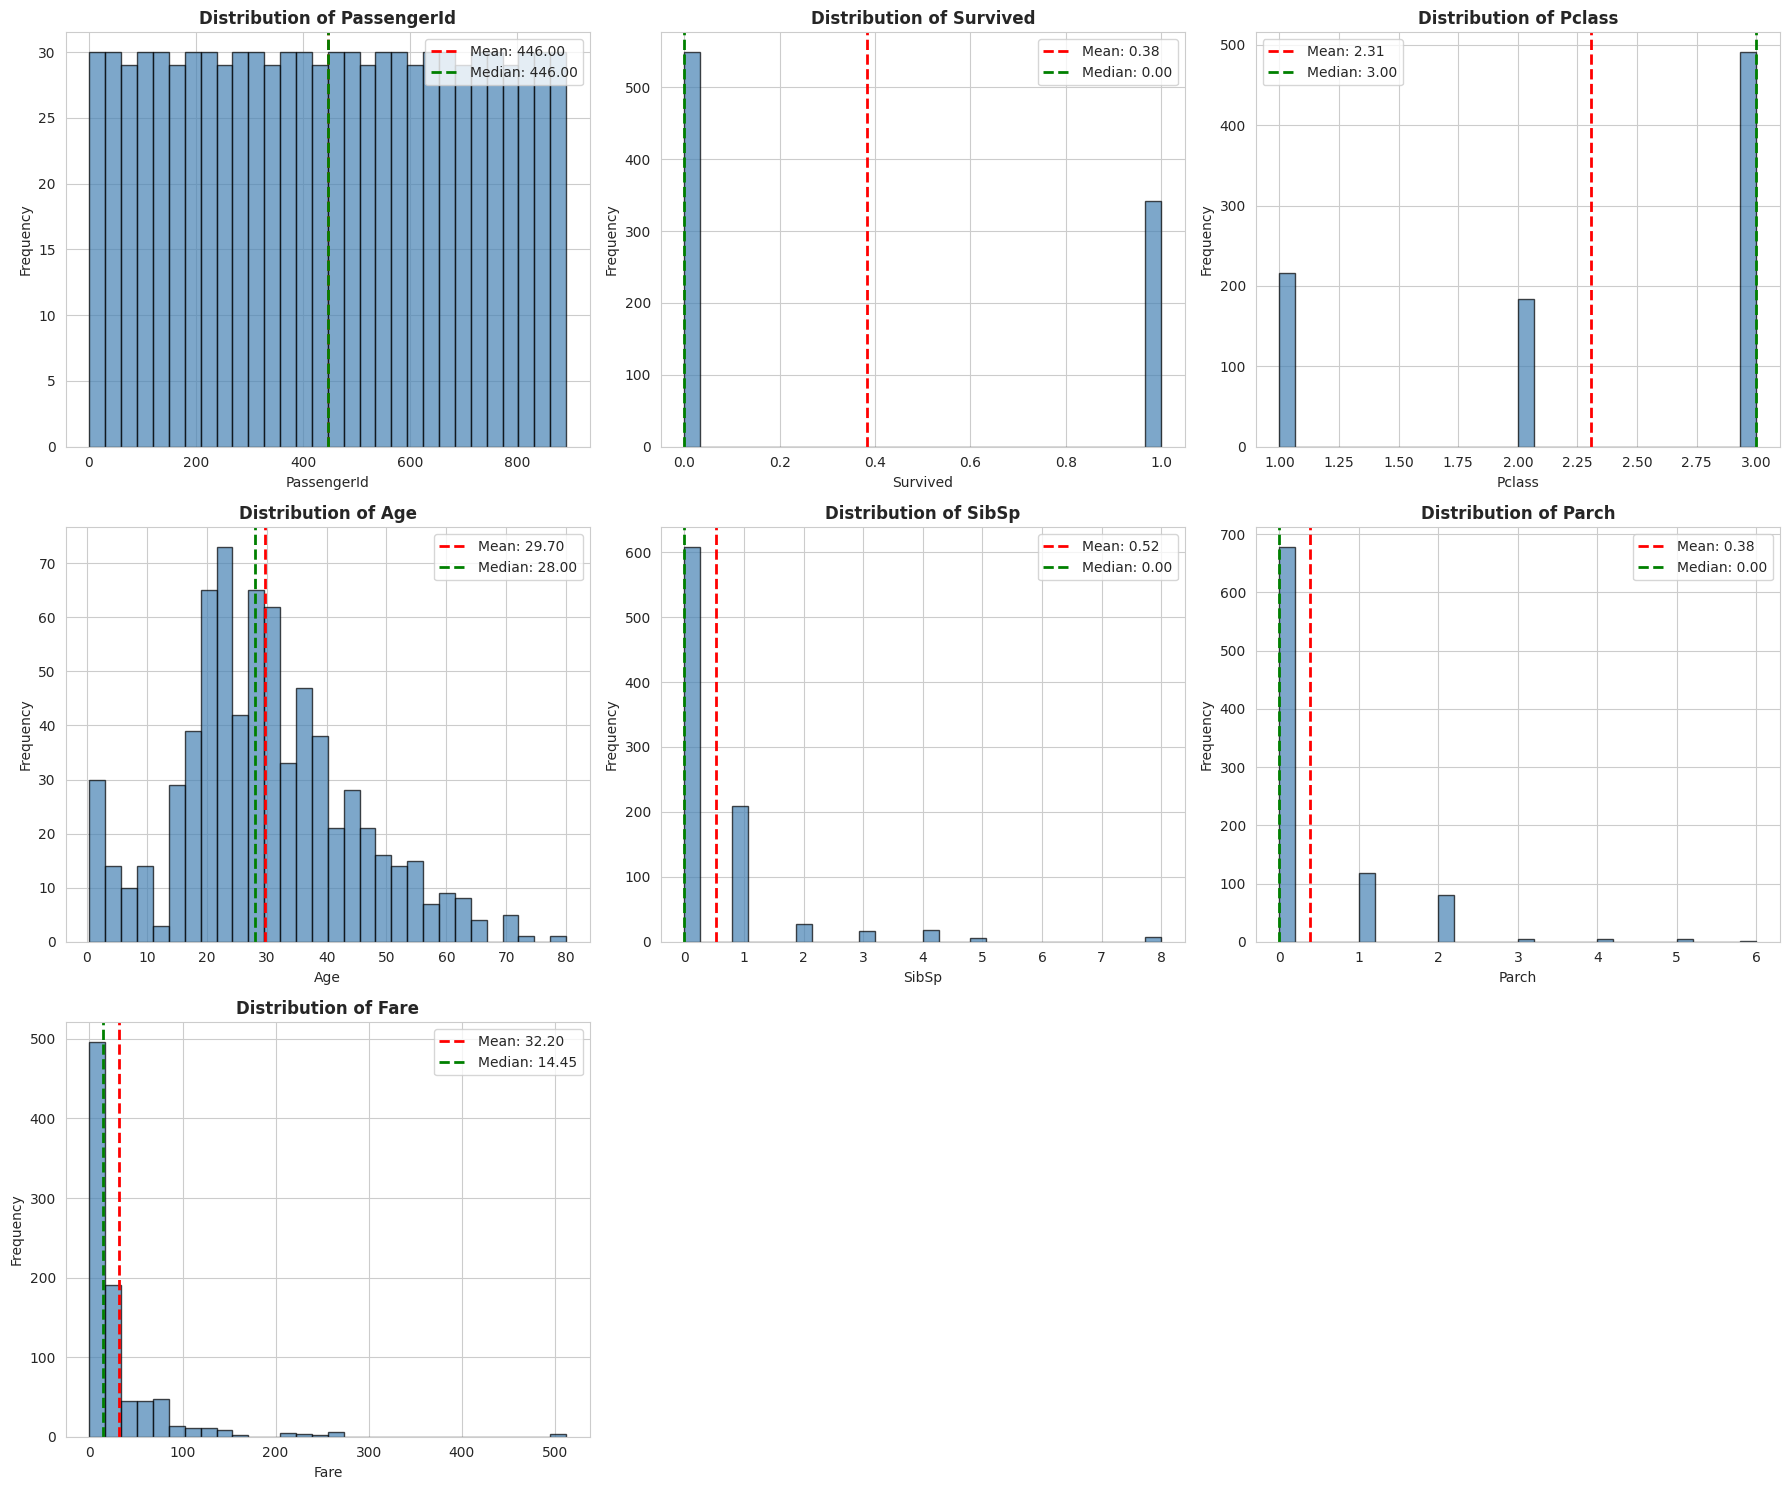

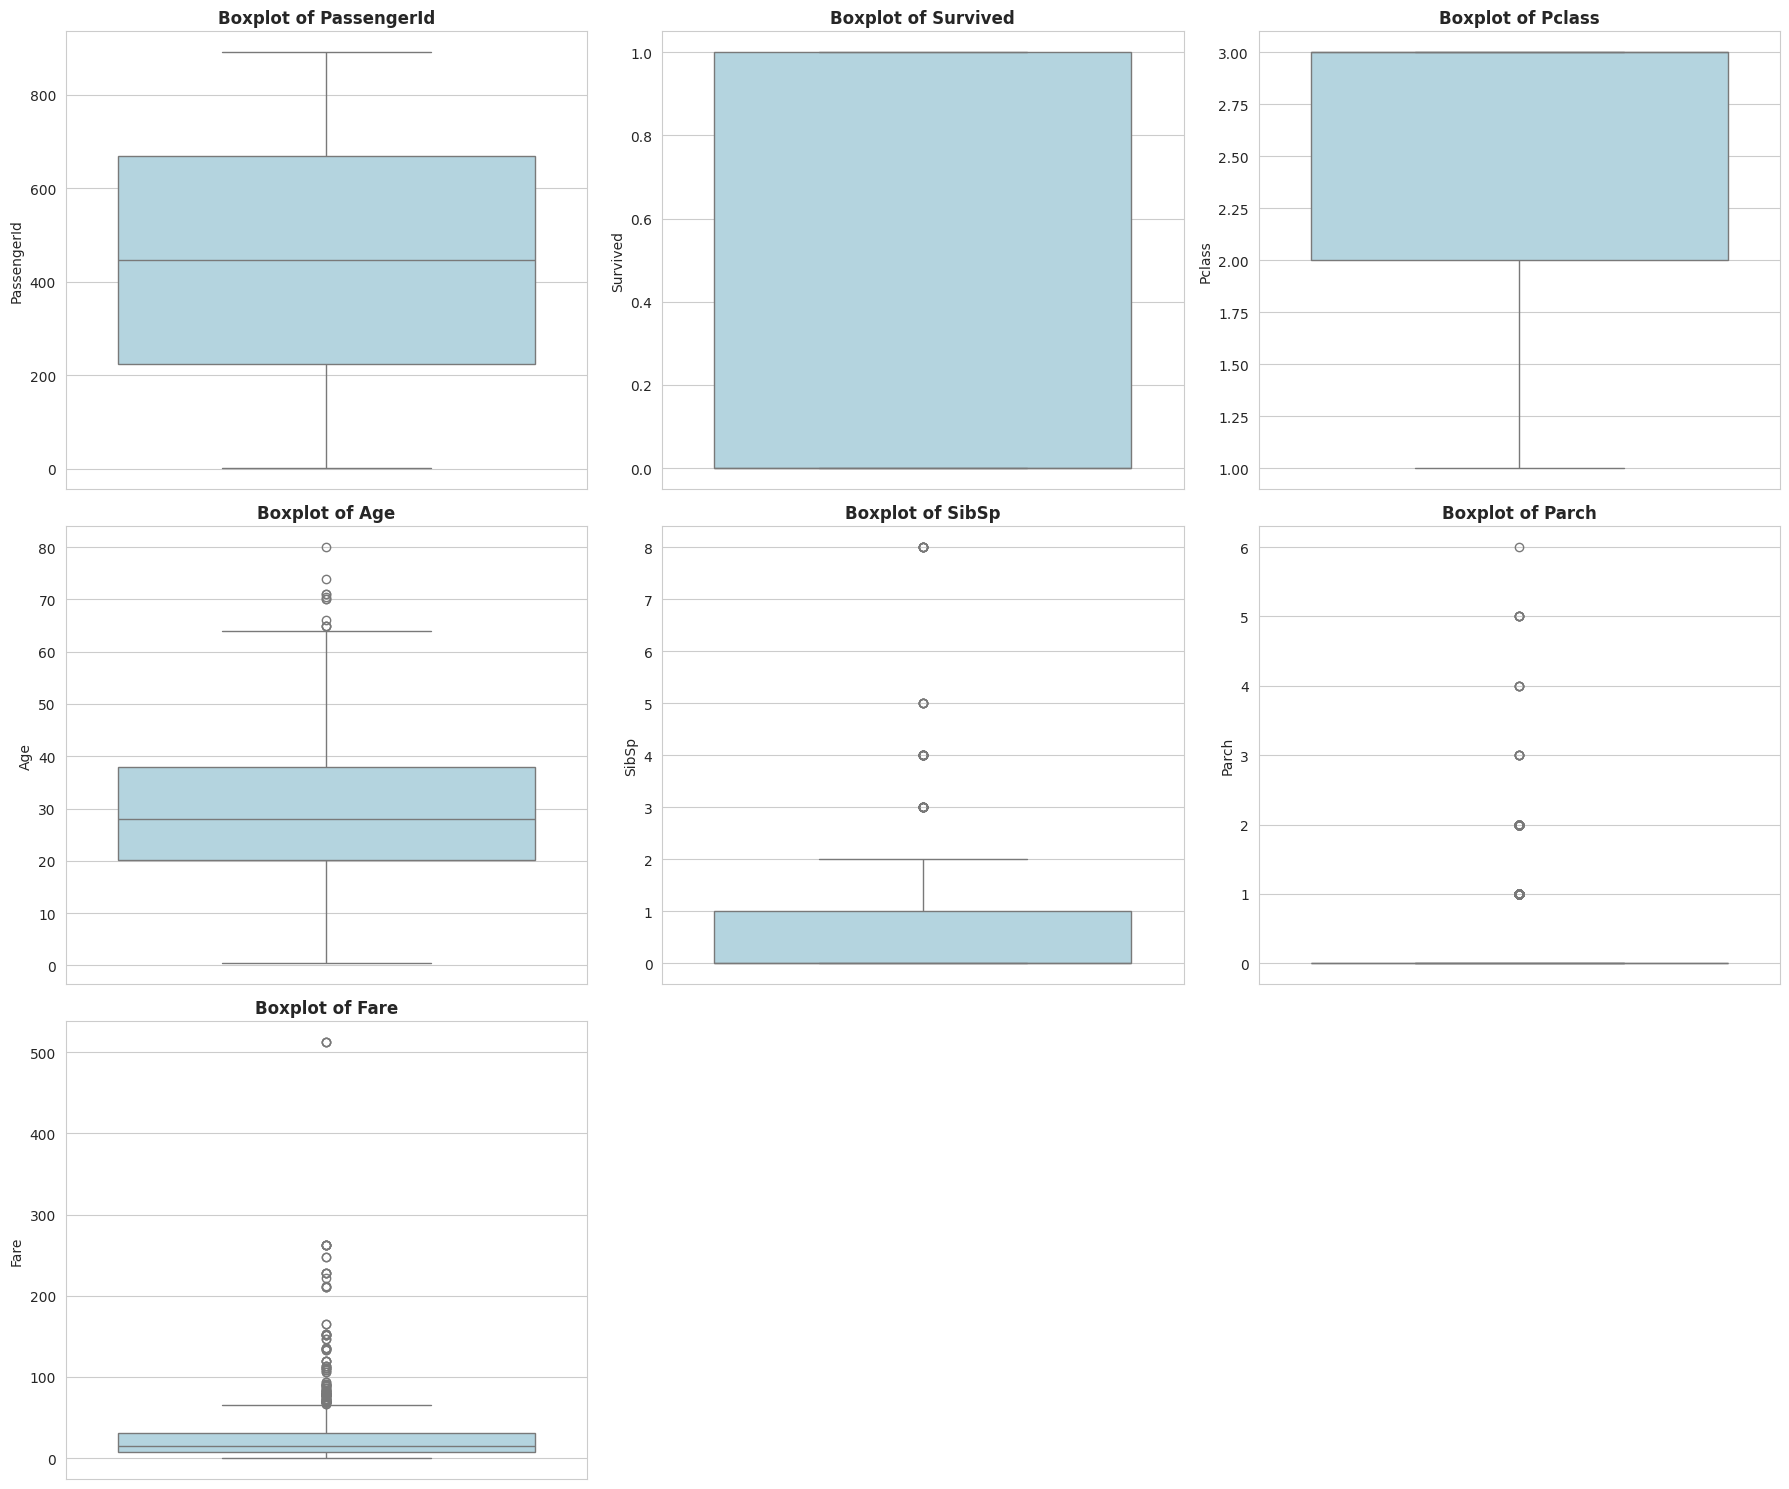


--- Skewness Analysis ---
Age: 0.389 - Approximately Symmetric
Fare: 4.787 - Right Skewed (Positive Skew)


In [8]:
print("\n" + "="*80)
print("[STEP 5] Univariate Analysis - Numerical Features")
print("="*80)

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

# Distribution plots for numerical features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        df[col].dropna().hist(bins=30, ax=axes[idx], color='steelblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

        # Add statistics
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        axes[idx].legend()

# Remove empty subplots
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Boxplots for outlier detection
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        sns.boxplot(data=df, y=col, ax=axes[idx], color='lightblue')
        axes[idx].set_title(f'Boxplot of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel(col)

# Remove empty subplots
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Skewness analysis
print("\n--- Skewness Analysis ---")
for col in ['Age', 'Fare']:
    if col in df.columns:
        skew = df[col].skew()
        print(f"{col}: {skew:.3f}", end=" - ")
        if abs(skew) < 0.5:
            print("Approximately Symmetric")
        elif skew > 0:
            print("Right Skewed (Positive Skew)")
        else:
            print("Left Skewed (Negative Skew)")

> # ***7. UNIVARIATE ANALYSIS - CATEGORICAL FEATURES***


[STEP 6] Univariate Analysis - Categorical Features


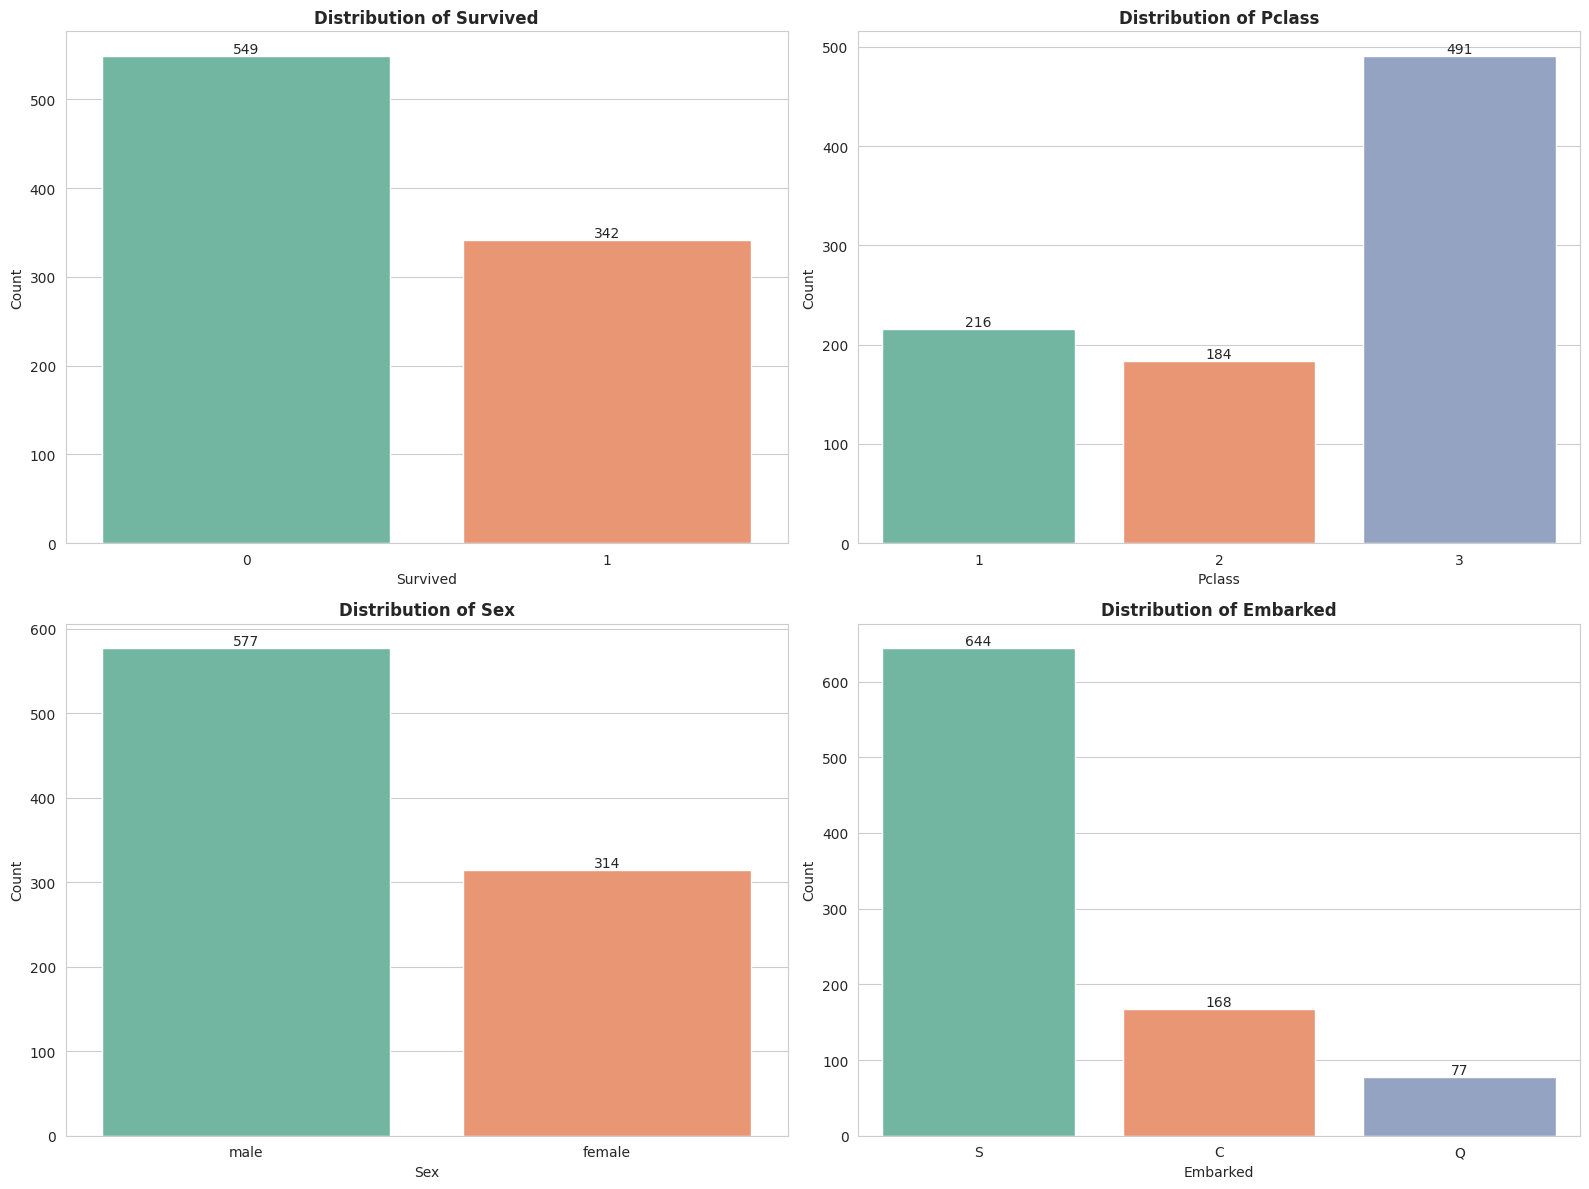


--- Categorical Features Value Counts ---

Survived:
Survived
0    549
1    342
Name: count, dtype: int64
Percentage:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Percentage:
Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64

Sex:
Sex
male      577
female    314
Name: count, dtype: int64
Percentage:
Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

Embarked:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Percentage:
Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64


In [9]:
print("\n" + "="*80)
print("[STEP 6] Univariate Analysis - Categorical Features")
print("="*80)

categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    if col in df.columns:
        value_counts = df[col].value_counts()

        # Bar plot
        sns.countplot(data=df, x=col, ax=axes[idx], palette='Set2')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')

        # Add value labels on bars
        for container in axes[idx].containers:
            axes[idx].bar_label(container)

plt.tight_layout()
plt.show()

# Detailed counts
print("\n--- Categorical Features Value Counts ---")
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts())
        print(f"Percentage:\n{df[col].value_counts(normalize=True)*100}")

> # ***8. BIVARIATE ANALYSIS***


[STEP 7] Bivariate Analysis


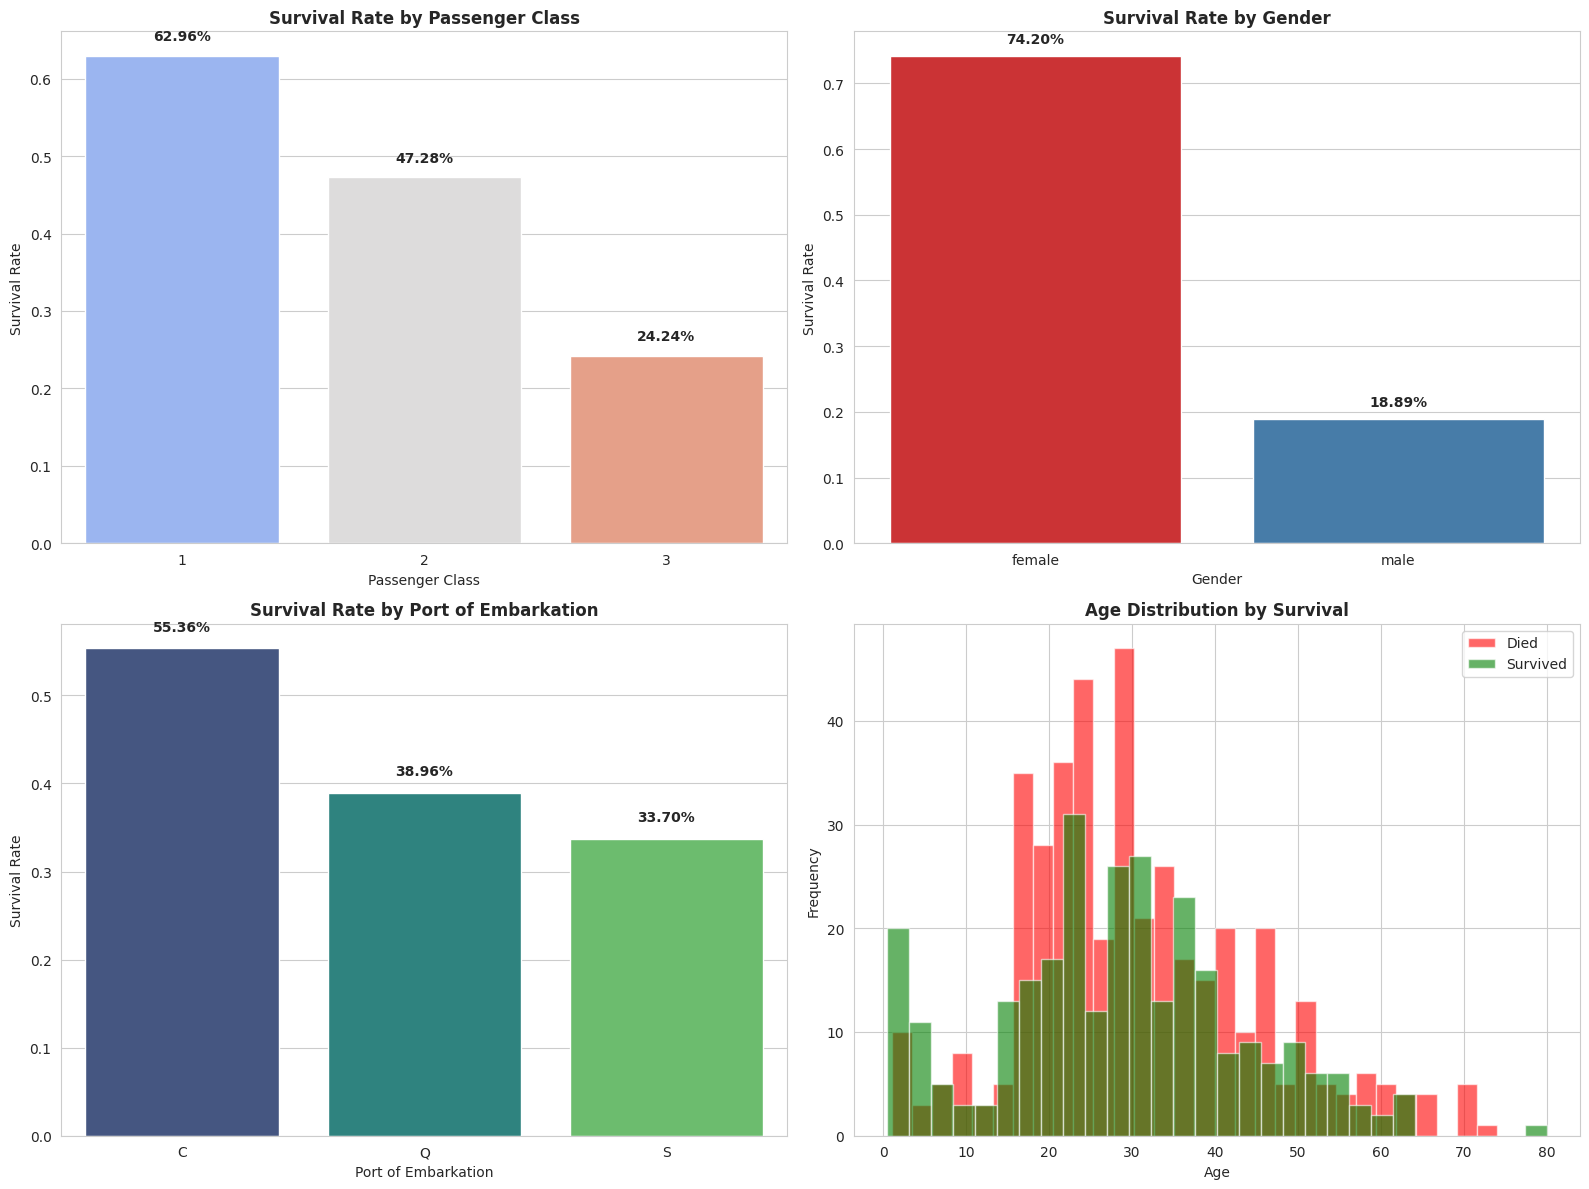


--- Survival by Class and Gender ---
Survived              0         1
Pclass Sex                       
1      female  0.031915  0.968085
       male    0.631148  0.368852
2      female  0.078947  0.921053
       male    0.842593  0.157407
3      female  0.500000  0.500000
       male    0.864553  0.135447


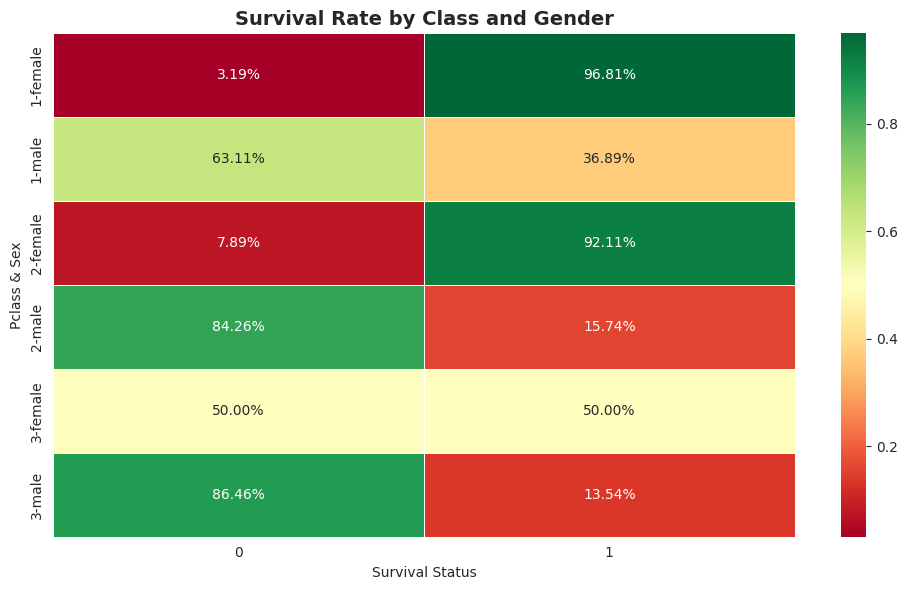

In [10]:
print("\n" + "="*80)
print("[STEP 7] Bivariate Analysis")
print("="*80)

# Survival rate by different features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Survival by Pclass
survival_pclass = df.groupby('Pclass')['Survived'].mean()
sns.barplot(x=survival_pclass.index, y=survival_pclass.values, ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Survival Rate by Passenger Class', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Survival Rate')
axes[0, 0].set_xlabel('Passenger Class')
for i, v in enumerate(survival_pclass.values):
    axes[0, 0].text(i, v + 0.02, f'{v:.2%}', ha='center', fontweight='bold')

# Survival by Sex
survival_sex = df.groupby('Sex')['Survived'].mean()
sns.barplot(x=survival_sex.index, y=survival_sex.values, ax=axes[0, 1], palette='Set1')
axes[0, 1].set_title('Survival Rate by Gender', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Survival Rate')
axes[0, 1].set_xlabel('Gender')
for i, v in enumerate(survival_sex.values):
    axes[0, 1].text(i, v + 0.02, f'{v:.2%}', ha='center', fontweight='bold')

# Survival by Embarked
survival_embarked = df.groupby('Embarked')['Survived'].mean()
sns.barplot(x=survival_embarked.index, y=survival_embarked.values, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Survival Rate by Port of Embarkation', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Survival Rate')
axes[1, 0].set_xlabel('Port of Embarkation')
for i, v in enumerate(survival_embarked.values):
    axes[1, 0].text(i, v + 0.02, f'{v:.2%}', ha='center', fontweight='bold')

# Age distribution by Survival
df[df['Survived']==0]['Age'].hist(bins=30, ax=axes[1, 1], alpha=0.6, label='Died', color='red')
df[df['Survived']==1]['Age'].hist(bins=30, ax=axes[1, 1], alpha=0.6, label='Survived', color='green')
axes[1, 1].set_title('Age Distribution by Survival', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Crosstab analysis
print("\n--- Survival by Class and Gender ---")
survival_crosstab = pd.crosstab([df['Pclass'], df['Sex']], df['Survived'], normalize='index')
print(survival_crosstab)

# Heatmap of crosstab
plt.figure(figsize=(10, 6))
sns.heatmap(survival_crosstab, annot=True, fmt='.2%', cmap='RdYlGn', linewidths=0.5)
plt.title('Survival Rate by Class and Gender', fontsize=14, fontweight='bold')
plt.ylabel('Pclass & Sex')
plt.xlabel('Survival Status')
plt.tight_layout()
plt.show()

> # ***9. CORRELATION ANALYSIS***


[STEP 8] Correlation Analysis

--- Correlation Matrix ---
          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.359653 -0.077221 -0.017358  0.093317  0.268189
Pclass   -0.359653  1.000000 -0.369226  0.067247  0.025683 -0.554182
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.017358  0.067247 -0.308247  1.000000  0.383820  0.138329
Parch     0.093317  0.025683 -0.189119  0.383820  1.000000  0.205119
Fare      0.268189 -0.554182  0.096067  0.138329  0.205119  1.000000


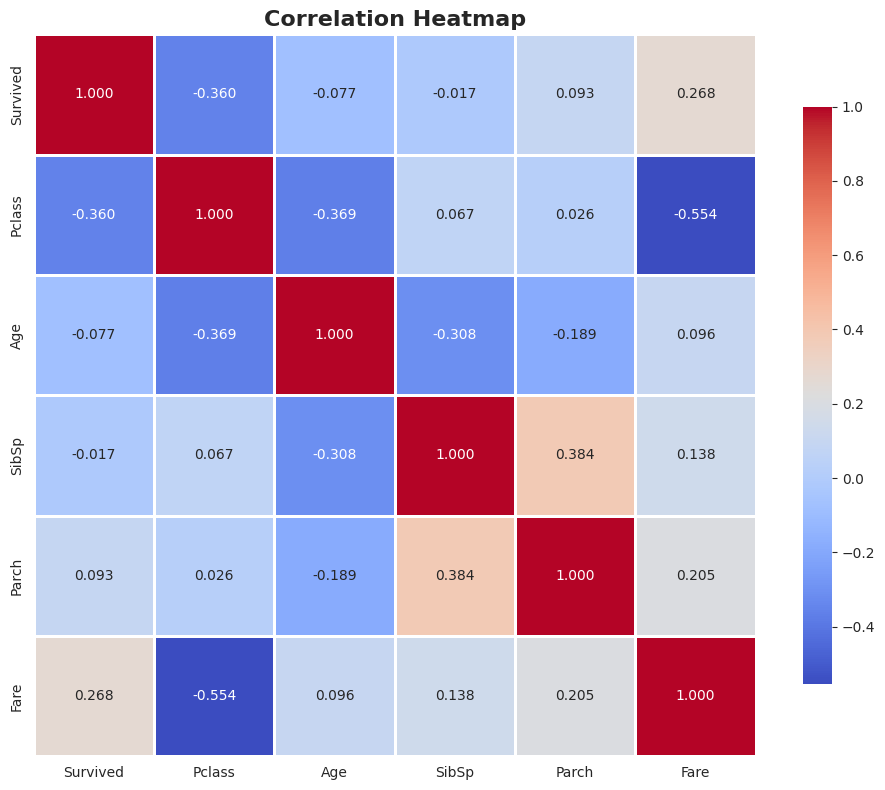


--- Features Correlation with Survival ---
Survived    1.000000
Fare        0.268189
Parch       0.093317
SibSp      -0.017358
Age        -0.077221
Pclass     -0.359653
Name: Survived, dtype: float64


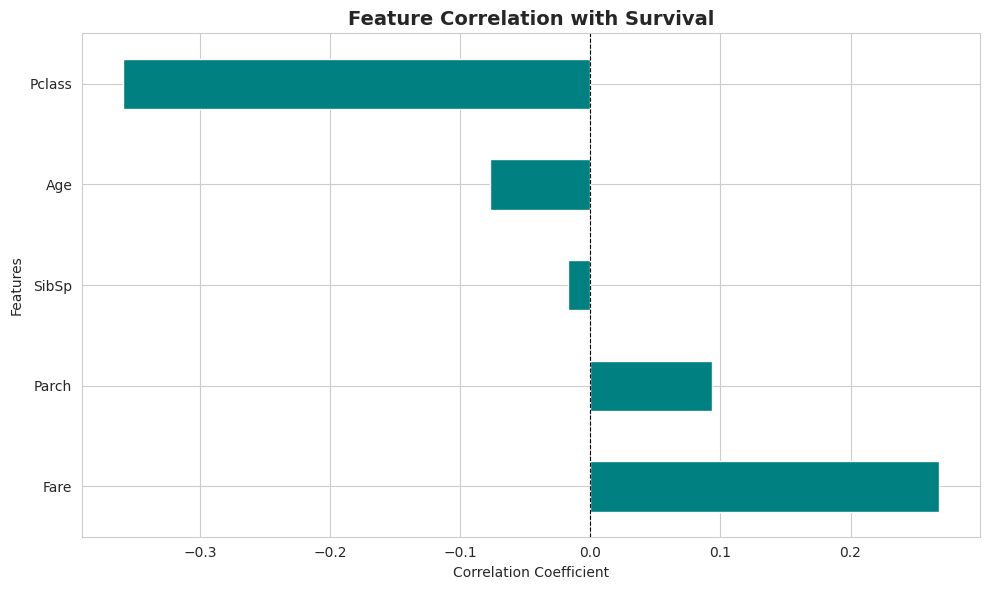

In [11]:
print("\n" + "="*80)
print("[STEP 8] Correlation Analysis")
print("="*80)

# Select numerical columns for correlation
corr_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr_df = df[corr_cols].dropna()

# Correlation matrix
correlation_matrix = corr_df.corr()
print("\n--- Correlation Matrix ---")
print(correlation_matrix)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlation with Survival
print("\n--- Features Correlation with Survival ---")
survival_corr = correlation_matrix['Survived'].sort_values(ascending=False)
print(survival_corr)

plt.figure(figsize=(10, 6))
survival_corr.drop('Survived').plot(kind='barh', color='teal')
plt.title('Feature Correlation with Survival', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

> # ***10. MULTIVARIATE ANALYSIS***


[STEP 9] Multivariate Analysis

Generating pairplot (this may take a moment)...


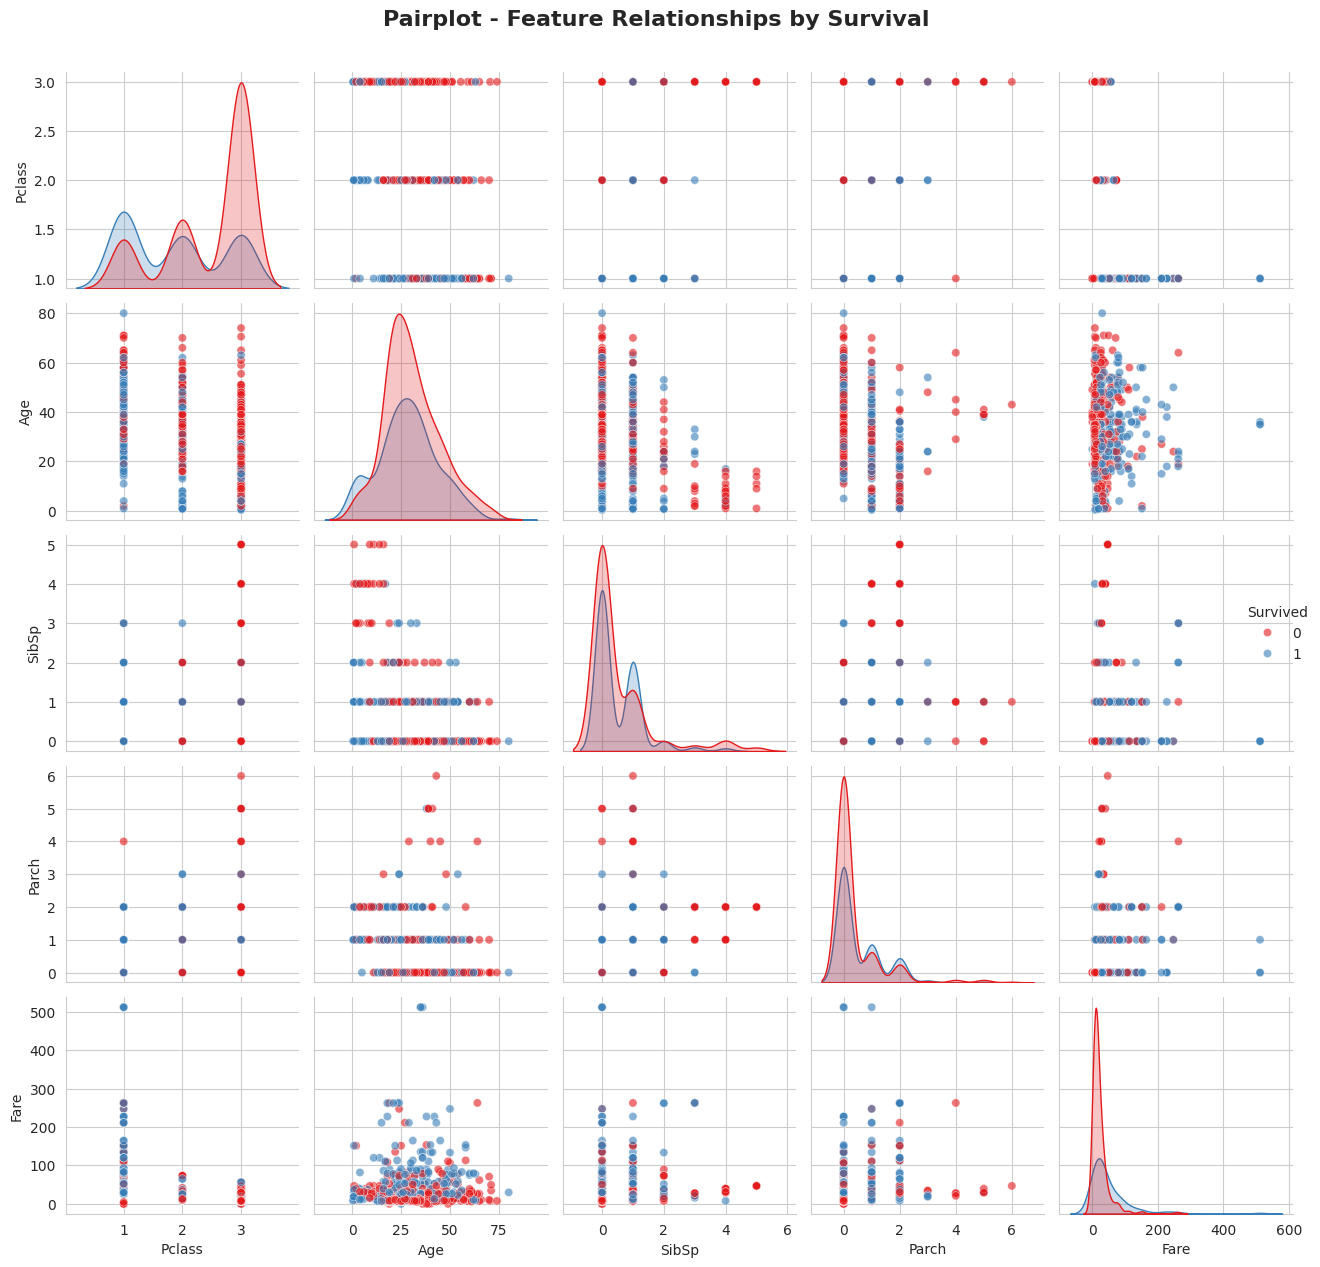

In [12]:
print("\n" + "="*80)
print("[STEP 9] Multivariate Analysis")
print("="*80)

# Pairplot
print("\nGenerating pairplot (this may take a moment)...")
pairplot_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
pairplot_df = df[pairplot_cols].dropna()

sns.pairplot(pairplot_df, hue='Survived', palette='Set1', diag_kind='kde',
             plot_kws={'alpha': 0.6}, height=2.5)
plt.suptitle('Pairplot - Feature Relationships by Survival', y=1.01, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 3D scatter plot using Plotly
fig = px.scatter_3d(df.dropna(subset=['Age', 'Fare', 'Pclass']),
                    x='Age', y='Fare', z='Pclass',
                    color='Survived',
                    symbol='Sex',
                    title='3D Scatter: Age, Fare, and Class by Survival',
                    labels={'Survived': 'Survived'},
                    color_continuous_scale='RdYlGn')
fig.update_layout(height=700)
fig.show()

> # ***11. ADVANCED VISUALIZATIONS WITH PLOTLY***

In [13]:
print("\n" + "="*80)
print("[STEP 10] Advanced Interactive Visualizations")
print("="*80)

# Interactive survival analysis
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Survival Count', 'Survival by Class',
                    'Survival by Gender', 'Survival by Age Group'),
    specs=[[{'type': 'bar'}, {'type': 'bar'}],
           [{'type': 'bar'}, {'type': 'bar'}]]
)

# Survival count
survival_counts = df['Survived'].value_counts()
fig.add_trace(
    go.Bar(x=['Died', 'Survived'], y=survival_counts.values,
           marker_color=['red', 'green'], name='Count'),
    row=1, col=1
)

# Survival by class
class_survival = df.groupby('Pclass')['Survived'].agg(['sum', 'count'])
class_survival['rate'] = class_survival['sum'] / class_survival['count']
fig.add_trace(
    go.Bar(x=class_survival.index, y=class_survival['rate'],
           marker_color='blue', name='Rate'),
    row=1, col=2
)

# Survival by gender
gender_survival = df.groupby('Sex')['Survived'].agg(['sum', 'count'])
gender_survival['rate'] = gender_survival['sum'] / gender_survival['count']
fig.add_trace(
    go.Bar(x=gender_survival.index, y=gender_survival['rate'],
           marker_color='purple', name='Rate'),
    row=2, col=1
)

# Survival by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
age_survival = df.groupby('AgeGroup')['Survived'].mean()
fig.add_trace(
    go.Bar(x=age_survival.index.astype(str), y=age_survival.values,
           marker_color='orange', name='Rate'),
    row=2, col=2
)

fig.update_layout(height=800, showlegend=False,
                  title_text="Comprehensive Survival Analysis Dashboard")
fig.show()


[STEP 10] Advanced Interactive Visualizations


> # ***12. KEY INSIGHTS AND PATTERNS***

In [14]:
print("\n" + "="*80)
print("[STEP 11] Key Insights and Patterns")
print("="*80)

print("\n1. SURVIVAL STATISTICS:")
print(f"   • Overall survival rate: {df['Survived'].mean()*100:.2f}%")
print(f"   • Female survival rate: {df[df['Sex']=='female']['Survived'].mean()*100:.2f}%")
print(f"   • Male survival rate: {df[df['Sex']=='male']['Survived'].mean()*100:.2f}%")

print("\n2. CLASS-BASED INSIGHTS:")
for pclass in sorted(df['Pclass'].unique()):
    rate = df[df['Pclass']==pclass]['Survived'].mean()*100
    print(f"   • Class {pclass} survival rate: {rate:.2f}%")

print("\n3. AGE INSIGHTS:")
print(f"   • Average age of survivors: {df[df['Survived']==1]['Age'].mean():.2f} years")
print(f"   • Average age of non-survivors: {df[df['Survived']==0]['Age'].mean():.2f} years")

print("\n4. FARE INSIGHTS:")
print(f"   • Average fare of survivors: ${df[df['Survived']==1]['Fare'].mean():.2f}")
print(f"   • Average fare of non-survivors: ${df[df['Survived']==0]['Fare'].mean():.2f}")

print("\n5. FAMILY SIZE INSIGHTS:")
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
family_survival = df.groupby('FamilySize')['Survived'].mean()
print(f"   • Best survival rate for family size: {family_survival.idxmax()} ({family_survival.max()*100:.2f}%)")

print("\n6. DETECTED PATTERNS:")
print("   • Women had significantly higher survival rates than men")
print("   • First-class passengers had better survival rates")
print("   • Age shows moderate negative correlation with survival")
print("   • Fare shows positive correlation with survival")
print("   • Passengers from Cherbourg (C) had higher survival rates")

print("\n7. DATA QUALITY ISSUES:")
print(f"   • Age: {df['Age'].isnull().sum()} missing values ({df['Age'].isnull().sum()/len(df)*100:.1f}%)")
print(f"   • Cabin: {df['Cabin'].isnull().sum()} missing values ({df['Cabin'].isnull().sum()/len(df)*100:.1f}%)")
print(f"   • Embarked: {df['Embarked'].isnull().sum()} missing values")

print("\n8. OUTLIERS DETECTED:")
print(f"   • Fare has extreme outliers (max: ${df['Fare'].max():.2f})")
print(f"   • Age distribution is relatively normal with slight right skew")

print("\n" + "="*80)
print("EDA COMPLETED SUCCESSFULLY!")
print("="*80)
print("\nNext Steps:")
print("1. Handle missing values (imputation or removal)")
print("2. Feature engineering (create new features)")
print("3. Encode categorical variables")
print("4. Handle outliers if necessary")
print("5. Feature scaling/normalization")
print("6. Model building and evaluation")
print("="*80)


[STEP 11] Key Insights and Patterns

1. SURVIVAL STATISTICS:
   • Overall survival rate: 38.38%
   • Female survival rate: 74.20%
   • Male survival rate: 18.89%

2. CLASS-BASED INSIGHTS:
   • Class 1 survival rate: 62.96%
   • Class 2 survival rate: 47.28%
   • Class 3 survival rate: 24.24%

3. AGE INSIGHTS:
   • Average age of survivors: 28.34 years
   • Average age of non-survivors: 30.63 years

4. FARE INSIGHTS:
   • Average fare of survivors: $48.40
   • Average fare of non-survivors: $22.12

5. FAMILY SIZE INSIGHTS:
   • Best survival rate for family size: 4 (72.41%)

6. DETECTED PATTERNS:
   • Women had significantly higher survival rates than men
   • First-class passengers had better survival rates
   • Age shows moderate negative correlation with survival
   • Fare shows positive correlation with survival
   • Passengers from Cherbourg (C) had higher survival rates

7. DATA QUALITY ISSUES:
   • Age: 177 missing values (19.9%)
   • Cabin: 687 missing values (77.1%)
   • Embar